In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [2]:
df = pd.read_csv('https://github.com/Serfentum/bf_course/raw/master/14.pandas/train.csv')

In [3]:
df.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


### Строим гистограммы частот четырех нуклеотидов

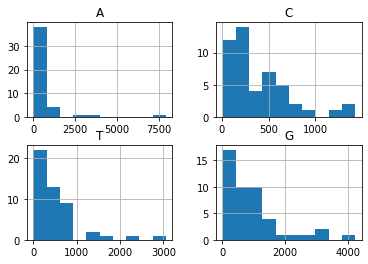

In [4]:
df.loc[:,['A','C','T','G']].hist();

### Сохраняем дата сет содержащий только колонки `pos`,`reads_all`,`mismatches`,`deletions`,`insertions`. Также в этом дата фрейме сохраняем только те строчки, в которых `matches` больше среднего и сохраняем этот файл в формате `csv`

In [5]:
df.loc[df['matches'] > df['matches'].mean()][['pos','reads_all','mismatches','deletions','insertions']].to_csv('train.csv')

## EDA

### Загрузим данные о Задержки рейса самолета в 2008 году

In [4]:
air_df = pd.read_csv('data/plane.csv')

In [5]:
air_df.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,Origin,Dest,Distance
0,2008,2,14,4,1222,1330,NW,1221,N371NW,188.0,DTW,DEN,1123
1,2008,1,13,7,2110,2251,FL,182,N974AT,101.0,ATL,DCA,547
2,2008,7,22,2,1625,1900,EV,4154,N738EV,155.0,ALB,ATL,852
3,2008,5,14,3,1510,1820,AA,1326,N523AA,130.0,STL,TPA,869
4,2008,4,1,2,955,1153,US,1910,N109UW,118.0,CLT,LGA,544


Наши данные имеют следующую структуру

In [6]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581028 entries, 0 to 581027
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            581028 non-null  int64  
 1   Month           581028 non-null  int64  
 2   DayofMonth      581028 non-null  int64  
 3   DayOfWeek       581028 non-null  int64  
 4   CRSDepTime      581028 non-null  int64  
 5   CRSArrTime      581028 non-null  int64  
 6   UniqueCarrier   581028 non-null  object 
 7   FlightNum       581028 non-null  int64  
 8   TailNum         581027 non-null  object 
 9   CRSElapsedTime  580969 non-null  float64
 10  Origin          581028 non-null  object 
 11  Dest            581028 non-null  object 
 12  Distance        581028 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 57.6+ MB


Теперь разберемся, что означает каждая колонка:
1. Year - год вылета
2. Month - месяц вылета
3. DayOfMonth - день вылета
4. DayOfWeek - неделя месяца вылета
5. CRSDepTime - задержка перед вылетом
6. CRSArrTime - задержка во время полета
7. UniqueCarrier - ...
8. FlightNum - номер вылета
9. TailNum - номер посадки
10. CRSElapsedTime - ...
11. Origin - Город вылета
12. Dest - Город прилета
13. Distance - расстояния в км

Построим графики распределения все переменных, кроме года

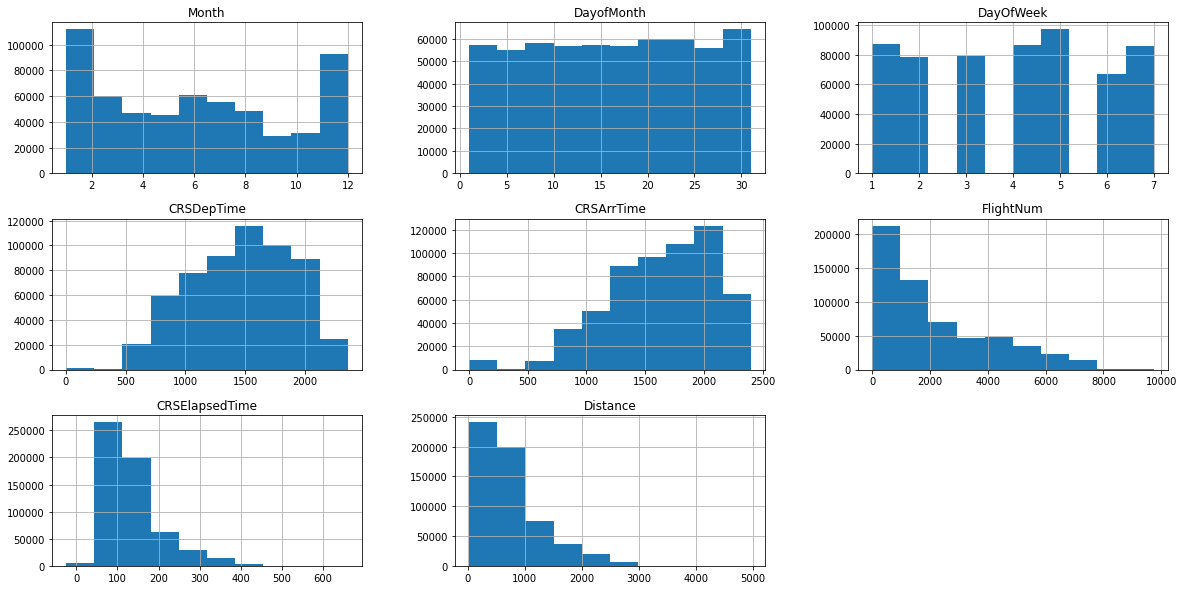

In [7]:
air_df.drop(['Year'], axis=1).hist(figsize=(20, 10));

Нарисуем таблицу корреляций между переменными

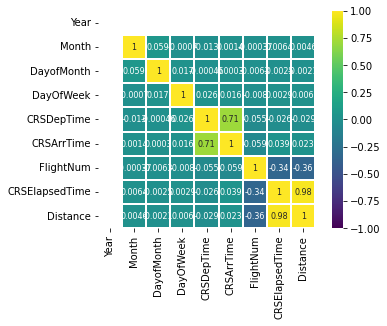

In [8]:
corr = air_df.corr()

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Работа с реальными данными

In [11]:
col_names_gff = ['chromosome', 'source', 'type', 'start', 'end', 'score','strand', 'phase', 'attributes']
col_names_bed = ['chromosome', 'start', 'end', 'name', 'score', 'strand']

In [12]:
def read_gff(file_path):
    df_in=pd.read_table(file_path,comment='#',sep='\t',header=None,names=col_names_gff)
    return df_in

def read_bed(file_path):
    df_in=pd.read_table(file_path, sep='\t',header=None,names=col_names_bed)
    return df_in

In [13]:
d_gff = read_gff('data/rrna_annotation.gff')

In [14]:
d_gff.head()

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [15]:
d_bed = read_bed('data/alignment.bed')

### Изменить `attributes` все на `S`

In [16]:
d_bed.head()

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-


In [17]:
d_gff['attributes'] = d_gff['attributes'].str.extract('(\d{1,2}S)')

In [18]:
d_gff.head() # DONE

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.0,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.0,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.0,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.0,-,.,23S


### Построить барплоты распределения рефсеков

In [19]:
count_ref = d_gff.groupby(['chromosome']).size()

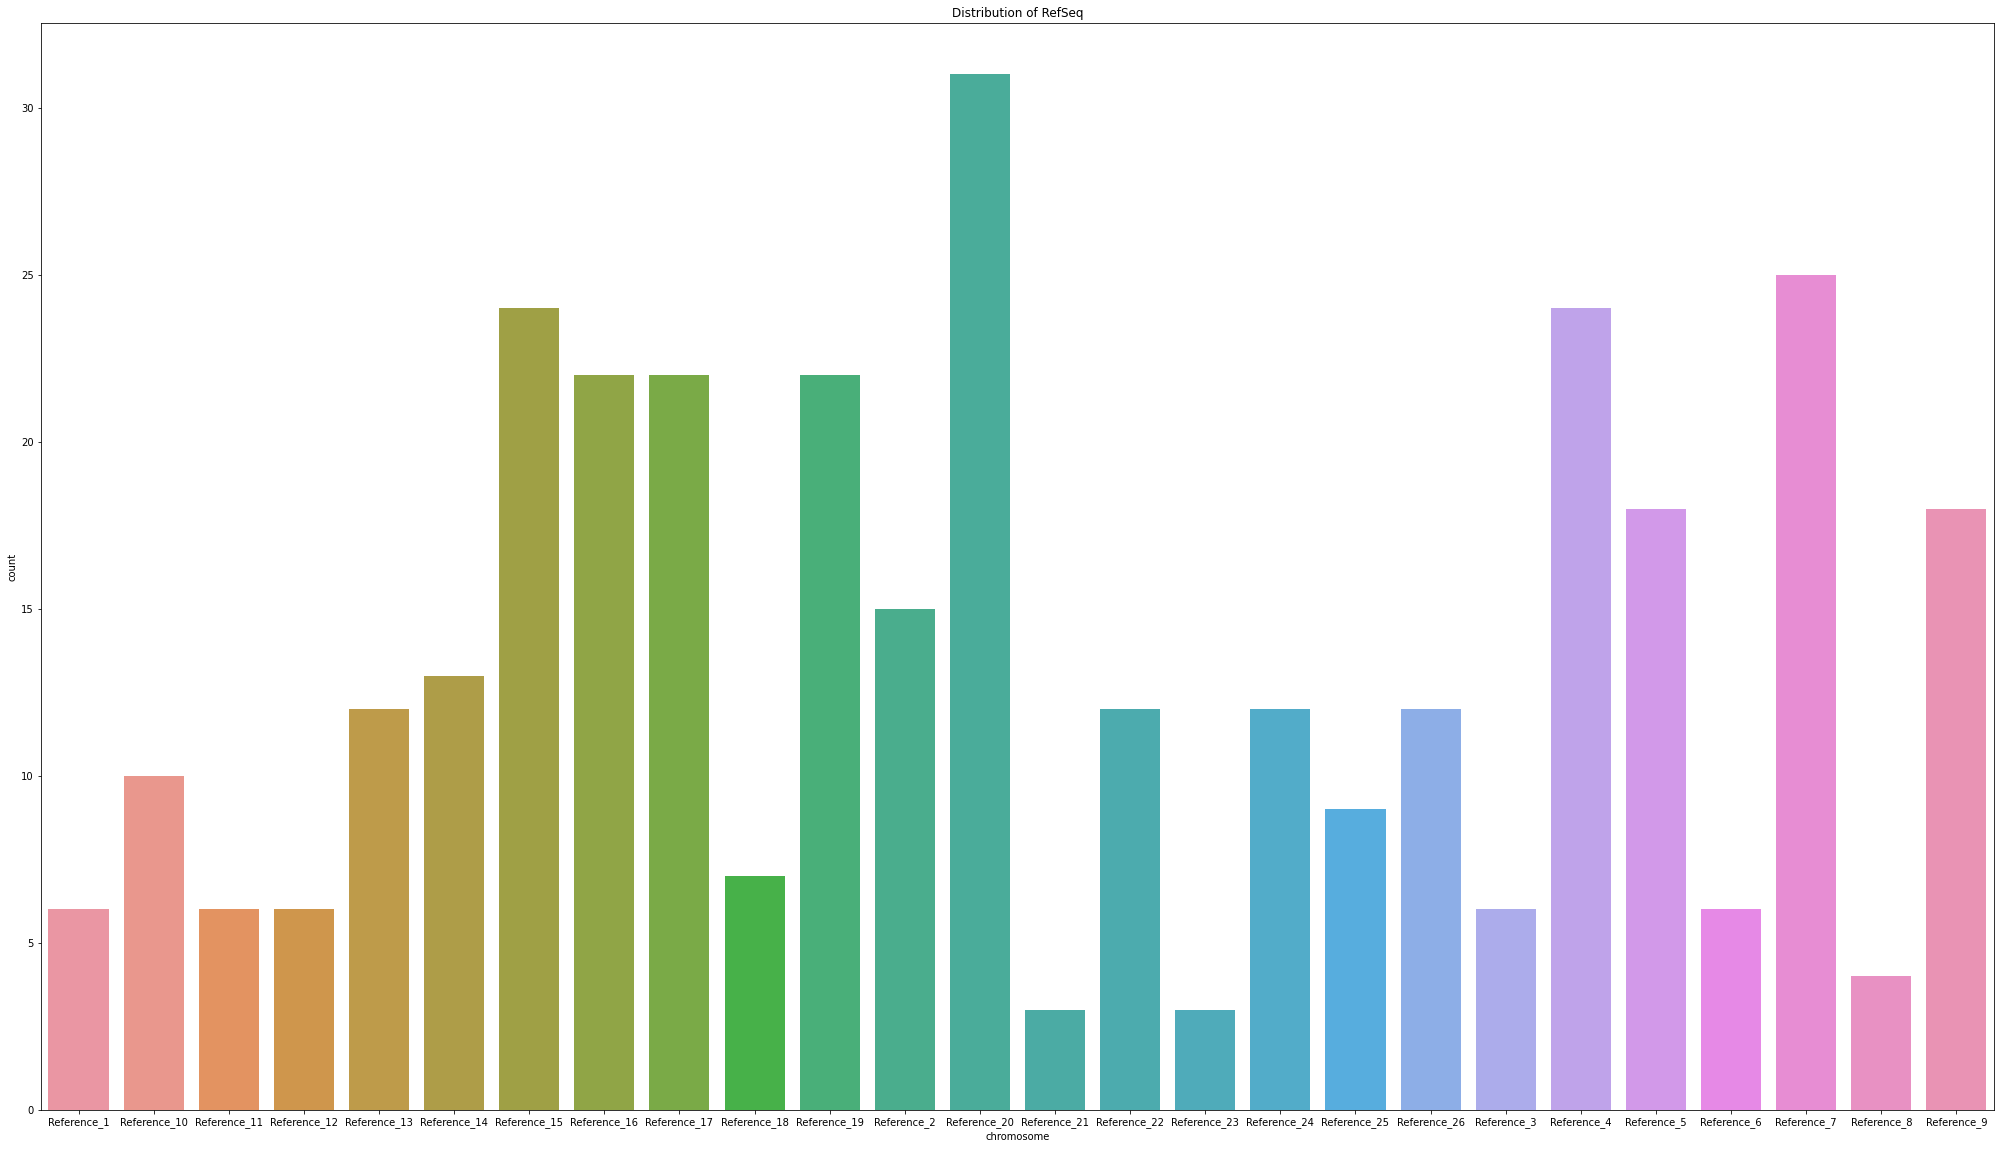

In [34]:
_, ax = plt.subplots(figsize = (35,20))
sns.barplot(x = count_ref.index, y = count_ref)
plt.ylabel('count');
plt.title('Distribution of RefSeq');


### Самое интересное, проверить, входит ли наши прочтения на gff

/var/folders/5l/9jtg_90x5s575m1zqn_h0kgm0000gn/T/ipykernel_9492/2175409250.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  plt.imshow(mpimg.imread('https://bedtools.readthedocs.io/en/latest/_images/intersect-glyph.png'))


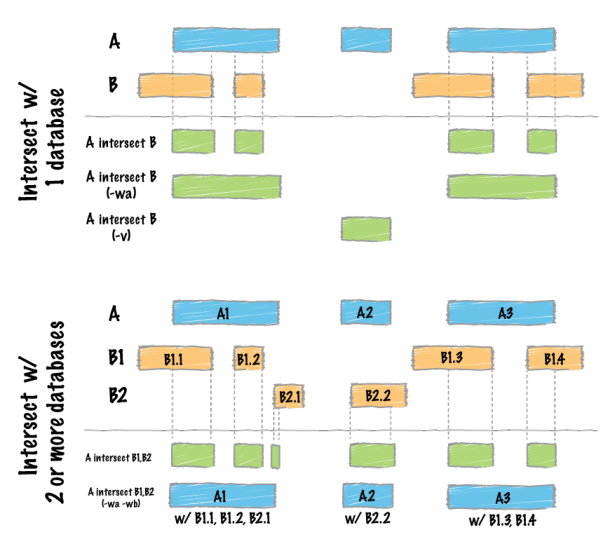

In [112]:
plt.figure(figsize=(20,10))
plt.imshow(mpimg.imread('https://bedtools.readthedocs.io/en/latest/_images/intersect-glyph.png'))
plt.axis('off'); # Reminder

REMBER GFF starts with 1, and BED with 0

In [64]:
inter = d_gff.merge(d_bed, on='chromosome')

In [67]:
inter.shape

(126748, 14)

Берем только те строки, которые входят в интервал референса!

In [113]:
inter[(inter.start_y <= inter.end_x - 1) & (inter.end_y >= inter.start_x - 1)]

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
66,Reference_10,barrnap:0.9,rRNA,3633020,3634549,0.000000e+00,-,.,16S,3633634,3633707,NODE_19846_length_73_cov_334.777778,0,-
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126258,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S,3744031,3744496,NODE_5333_length_465_cov_547.609756,0,-
126259,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S,3744386,3744496,NODE_19543_length_110_cov_1549.290909,0,+
126260,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S,3745375,3747691,NODE_1541_length_2318_cov_1479.494034,0,+
126742,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.000000e+00,-,.,16S,3745375,3747691,NODE_1541_length_2318_cov_1479.494034,0,+


Получилось **816** прочтений выровнялось на наши референсы 

Вот что выдает нам стандартный `bedtools intersect`

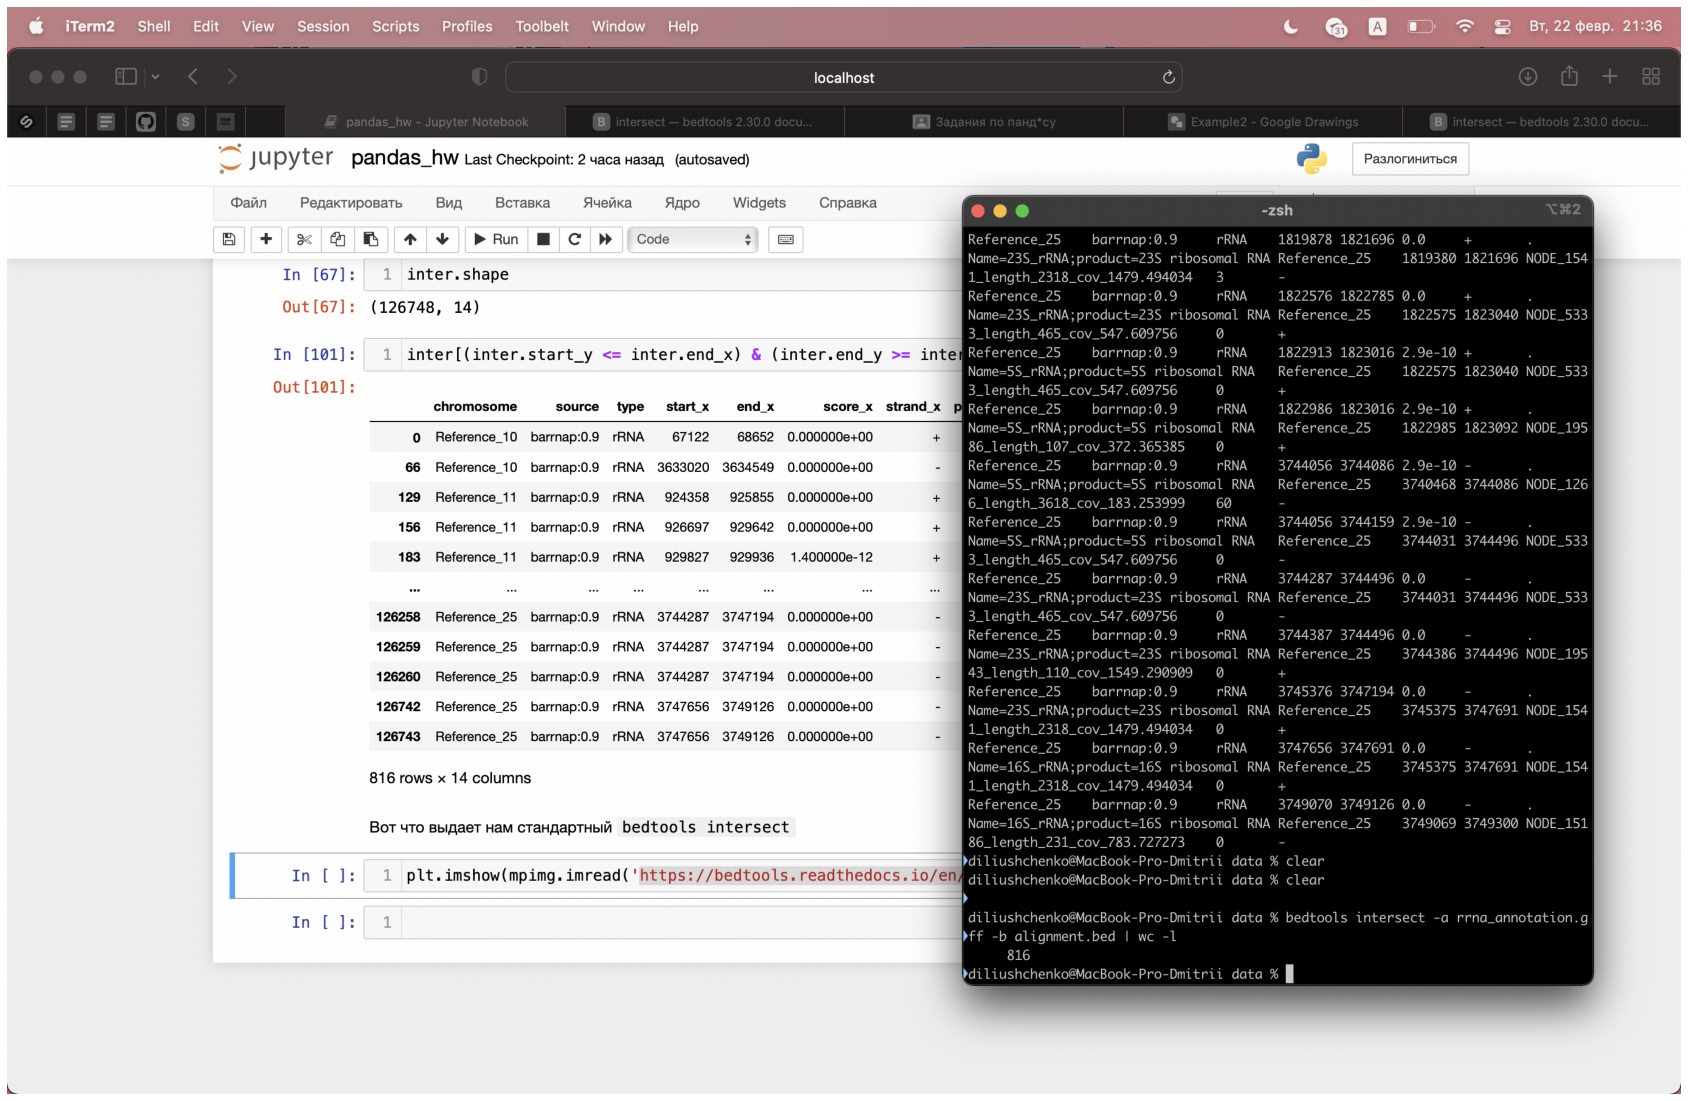

In [109]:
plt.figure(figsize=(30,30))
plt.imshow(mpimg.imread('/Users/diliushchenko/Desktop/Снимок экрана 2022-02-22 в 21.36.48.png'))
plt.axis('off');